In [2]:
import seaborn as sns
import pandas as pd

In [74]:
# Получить статистику по дням. 
# Просто посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.
# Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?

# Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех просмотров объявления к кликам. Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. Различается ли средний и медианный CTR объявлений в наших данных?

# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
# Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

# Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

# Для финансового отчета нужно рассчитать наш заработок по дням. В какой день мы заработали больше всего? В какой меньше? Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, и мы списываем деньги за каждый показ CPM объявления, если у CPM объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.
# Какая платформа самая популярная для размещения рекламных объявлений? Сколько процентов показов приходится на каждую из платформ (колонка platform)?

# А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

In [3]:
ads_data = pd.read_csv('lesson_5_ads_data.csv.zip', compression='zip', parse_dates=True)

In [4]:
ads_data['date'] = pd.to_datetime(ads_data['date'])

In [5]:
ads_data['full_date'] = pd.to_datetime(ads_data['time'], unit='s')

In [78]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793,2019-04-01 00:00:48
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29,2019-04-01 16:24:26


In [79]:
# Получить статистику по дням. 
# Посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.
# Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?

In [80]:
ads_data.groupby(['date'], as_index=False) \
        .agg({'client_union_id': 'count'})

,date,client_union_id
0,2019-04-01,35567
1,2019-04-02,147329
2,2019-04-03,216529
3,2019-04-04,127699
4,2019-04-05,2284883
5,2019-04-06,364707


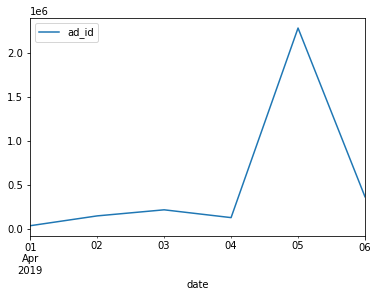

In [81]:
ads_data.groupby('date') \
    .agg({'ad_id': 'count'}).plot()

In [82]:
ads_data.groupby(['date', 'event'], as_index=False) \
    .agg({'campaign_union_id': 'count'}) \
    .pivot(index='date', columns='event', values='campaign_union_id').reset_index()

event,date,click,view
0,2019-04-01,735,34832
1,2019-04-02,1518,145811
2,2019-04-03,1678,214851
3,2019-04-04,1517,126182
4,2019-04-05,501595,1783288
5,2019-04-06,80420,284287


In [10]:
ads_data_group = ads_data.groupby(['date', 'event']) \
    .agg({'campaign_union_id': 'count'})

In [83]:
ads_data[ads_data.date == '2019-04-05'] \
    .groupby('ad_id') \
    .agg({'time': 'count'}) \
    .sort_values('time', ascending=False) \
    .head()

,time
ad_id,
112583,2166611
29927,27186
44635,8268
46583,7327
44956,5656


In [84]:
ad_id = 112583

In [85]:
ads_data.query('ad_id == @ad_id').head(1)

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
527124,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,web,199.4,239408,4355,2019-04-05 16:10:36


In [86]:
# Посчитать количество кликов, показов, число уникальных объявлений и уникальных кампаний

In [87]:
ads_data_clicks_impr = ads_data.groupby(['date', 'event'], as_index=False) \
    .agg({'campaign_union_id': 'count'}) \
    .pivot(index='date', columns='event', values='campaign_union_id').reset_index()
ads_data_uniq = ads_data.groupby(['date'], as_index=False).agg({'campaign_union_id': ['nunique'], 'ad_id': ['nunique']})

In [88]:
ads_data_clicks_impr.merge(ads_data_uniq, how='inner', on='date')

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/opt/tljh/user/lib/python3.7/site-packages/pandas/core/generic.py:3884: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,date,click,view,"(campaign_union_id, nunique)","(ad_id, nunique)"
0,2019-04-01,735,34832,49,49
1,2019-04-02,1518,145811,146,146
2,2019-04-03,1678,214851,177,179
3,2019-04-04,1517,126182,147,150
4,2019-04-05,501595,1783288,130,131
5,2019-04-06,80420,284287,60,61


In [89]:
# Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех просмотров объявления к кликам. 
# Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. 
# Различается ли средний и медианный CTR объявлений в наших данных?

In [90]:
ads_data_by_ad = ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index()
ads_data_by_ad

event,ad_id,click,view
0,3,9.0,490.0
1,2132,1.0,95.0
2,2276,2.0,1454.0
3,2475,NaN,132.0
4,2643,3.0,286.0
...,...,...,...
350,121941,1.0,640.0
351,121943,15.0,1722.0
352,122042,1.0,155.0
353,122063,1.0,260.0


In [91]:
ads_data_by_ad = ads_data_by_ad.assign(ctr = ads_data_by_ad.click / ads_data_by_ad.view, 
                           ctr_per = 100 * ads_data_by_ad.click / ads_data_by_ad.view)
ads_data_by_ad

event,ad_id,click,view,ctr,ctr_per
0,3,9.0,490.0,0.018367,1.836735
1,2132,1.0,95.0,0.010526,1.052632
2,2276,2.0,1454.0,0.001376,0.137552
3,2475,NaN,132.0,NaN,NaN
4,2643,3.0,286.0,0.010490,1.048951
...,...,...,...,...,...
350,121941,1.0,640.0,0.001563,0.156250
351,121943,15.0,1722.0,0.008711,0.871080
352,122042,1.0,155.0,0.006452,0.645161
353,122063,1.0,260.0,0.003846,0.384615


In [92]:
ads_data_by_ad.sort_values('ctr', ascending=False).head(10)

event,ad_id,click,view,ctr,ctr_per
289,112583,580436.0,1934788.0,0.300000,29.999979
324,119450,258.0,1254.0,0.205742,20.574163
125,38575,43.0,257.0,0.167315,16.731518
144,40968,29.0,217.0,0.133641,13.364055
207,45642,42.0,344.0,0.122093,12.209302
283,110924,11.0,95.0,0.115789,11.578947
194,45043,28.0,245.0,0.114286,11.428571
96,35034,112.0,997.0,0.112337,11.233701
5,4585,53.0,476.0,0.111345,11.134454
328,120347,236.0,2168.0,0.108856,10.885609


In [93]:
ads_data_by_ad.ctr.mean()

0.020628096080757954

In [94]:
ads_data_by_ad.ctr.median()

0.010753240746688594

In [96]:
# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
# Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

In [97]:
ads_data_by_ad = ads_data_by_ad.fillna(0)
ads_data_by_ad.head()

event,ad_id,click,view,ctr,ctr_per
0,3,9.0,490.0,0.018367,1.836735
1,2132,1.0,95.0,0.010526,1.052632
2,2276,2.0,1454.0,0.001376,0.137552
3,2475,0.0,132.0,0.000000,0.000000
4,2643,3.0,286.0,0.010490,1.048951


In [98]:
ads_ids_bug = ads_data_by_ad.query('click == 0').ad_id
ads_ids_bug.head()

3      2475
26    16444
29    16678
30    16845
38    20871
Name: ad_id, dtype: int64

In [99]:
ads_data[ads_data.ad_id.isin(ads_ids_bug)] \
    .groupby('platform', as_index=False) \
    .agg({'ad_id': 'count'}) \
    .sort_values('ad_id')

,platform,ad_id
2,web,1988
1,ios,3075
0,android,4906


In [100]:
ads_data \
    .groupby('platform', as_index=False) \
    .agg({'ad_id': 'count'}) \
    .sort_values('ad_id')

,platform,ad_id
2,web,635425
1,ios,953078
0,android,1588211


In [101]:
# Чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

In [102]:
df_2019_04_04 =  ads_data[ads_data.date == '2019-04-04'].groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .fillna(0)

In [103]:
df_2019_04_04['ctr'] = df_2019_04_04.click / df_2019_04_04.view
df_2019_04_04

event,ad_id,click,view,ctr
0,9071,3.0,352.0,0.008523
1,9776,37.0,1115.0,0.033184
2,10601,3.0,848.0,0.003538
3,11887,151.0,8720.0,0.017317
4,12137,1.0,170.0,0.005882
...,...,...,...,...
145,120790,0.0,19.0,0.000000
146,121779,68.0,1116.0,0.060932
147,121790,7.0,701.0,0.009986
148,121941,0.0,95.0,0.000000


In [104]:
df_2019_04_04[df_2019_04_04.click > 0].ctr.quantile(q=0.95)

0.10211538461538454

In [105]:
# Есть ли различия в CTR у объявлений с видео и без?

In [112]:
ads_data_by_video = ads_data \
    .groupby(['date', 'event', 'has_video'], as_index=False) \
    .agg({'ad_id': 'count'}) \
    .sort_values('ad_id') \
    .pivot(index=['date','has_video'], columns='event', values='ad_id').reset_index()

In [114]:
ads_data_by_video = ads_data_by_video.assign(ctr = ads_data_by_ad.click / ads_data_by_ad.view, 
                           ctr_per = 100 * ads_data_by_ad.click / ads_data_by_ad.view)
ads_data_by_video

event,date,has_video,click,view,ctr,ctr_per
0,2019-04-01,0,730.0,34832.0,0.018367,1.836735
1,2019-04-01,1,5.0,NaN,0.010526,1.052632
2,2019-04-02,0,1513.0,144324.0,0.001376,0.137552
3,2019-04-02,1,5.0,1487.0,0.000000,0.000000
4,2019-04-03,0,1676.0,214004.0,0.010490,1.048951
5,2019-04-03,1,2.0,847.0,0.111345,11.134454
6,2019-04-04,0,1515.0,126072.0,0.002315,0.231481
7,2019-04-04,1,2.0,110.0,0.024605,2.460457
8,2019-04-05,0,501583.0,1779235.0,0.023474,2.347418
9,2019-04-05,1,12.0,4053.0,0.015873,1.587302


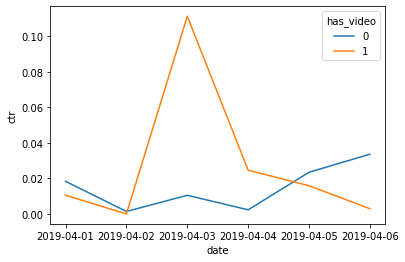

In [117]:
sns.lineplot(x="date", y="ctr",
             hue="has_video",
             data=ads_data_by_video)